# Module 1: Data Cleaning and Exploration with R

## Why This Matters for Business Analytics

In today's data-driven business environment, the ability to **clean, explore, and understand data** is fundamental to making informed decisions. Before any advanced analytics, machine learning, or predictive modeling can occur, analysts must:

1. **Import data** from various sources (databases, spreadsheets, APIs)
2. **Explore and validate** the data to understand its structure and quality
3. **Clean and transform** variables to prepare them for analysis
4. **Identify relationships** between variables that drive business outcomes

### The Cost of Poor Data Quality

According to IBM, poor data quality costs U.S. businesses **$3.1 trillion annually**. Common issues include:
- Missing or incomplete records
- Inconsistent formatting
- Duplicate entries
- Outliers that skew analysis

### Learning Objectives

By the end of this notebook, you will be able to:
- Import data from multiple file formats into R
- Use exploration functions to understand your data's structure
- Calculate and interpret descriptive statistics
- Create new variables through data transformation
- Recode continuous variables into meaningful categories
- Identify and visualize relationships between variables
- Test statistical assumptions required for further analysis

---

## 1. Importing Data into R

### Why Data Import Matters in Business

Every analytics project begins with **data acquisition**. In real-world business scenarios, data comes from multiple sources:
- **CRM systems** (customer data)
- **ERP systems** (financial, inventory, operations)
- **Marketing platforms** (campaign performance)
- **External vendors** (market research, demographics)

R supports numerous file formats, making it versatile for enterprise environments where data rarely comes in a single, clean format.

### Key Functions Covered:
| Function | Purpose |
|----------|---------|
| `setwd()` | Set the working directory (default file location) |
| `list.files()` | View all files in a directory |
| `read.csv()` | Import comma-separated values files |
| `read.table()` | Import text files with custom delimiters |

### Business Application
Imagine you're a marketing analyst who receives weekly sales reports as CSV files from the sales team and market research data as text files from an external vendor. You need to combine these sources to analyze campaign effectiveness.

In [1]:
# Method 1: Set working directory and import
# This sets the default location for reading/writing files
setwd("/workspaces/MS3313_base_template/data/module_1")

# List all files in the working directory
list.files()

[1] "mkt_data_processed.csv"                
[2] "report.html"                           
[3] "Session1-CC_Default_data_XXX_Bank.csv" 
[4] "Session1-data_corr_mkt.csv"            
[5] "Session1-Excercise-Zadas Data.csv"     
[6] "Session1-iris.csv"                     
[7] "Session1-iris.txt"                     
[8] "Session1-renew_behavior_xxx_logit.xlsx"
[9] "Session1-Salary and performance AZ.csv"

In [2]:
# Import CSV file from working directory
iris_data <- read.csv("Session1-iris.csv")

# Import TXT file (space or tab delimited)
iris_txt <- read.table("Session1-iris.txt", header = TRUE)

In [3]:
# Method 2: Direct import with full path
# This doesn't require setting working directory
mkt_data <- read.csv("/workspaces/MS3313_base_template/data/module_1/Session1-data_corr_mkt.csv", header = TRUE)

salary_data <- read.csv("/workspaces/MS3313_base_template/data/module_1/Session1-Salary and performance AZ.csv", header = TRUE)

## 2. Exploring Datasets

### Why Data Exploration is Critical for Business

**Data exploration** (also called Exploratory Data Analysis or EDA) is the process of examining your data before formal analysis. This step is crucial because:

1. **Prevents costly mistakes**: Running analyses on misunderstood data leads to wrong conclusions
2. **Identifies data quality issues**: Missing values, outliers, or formatting problems
3. **Informs analysis strategy**: Understanding variable types determines which statistical methods to use
4. **Saves time**: Catching problems early prevents rework later

### The "Trust but Verify" Principle

Never assume data is correct just because it came from an official source. Data entry errors, system glitches, and integration issues are common. **Always explore before you analyze.**

### Key Functions Covered:
| Function | Purpose | What It Tells You |
|----------|---------|-------------------|
| `View()` | Open data in spreadsheet view | Visual inspection of values |
| `names()` | List column names | What variables are available |
| `dim()` | Show dimensions (rows × columns) | Dataset size |
| `str()` | Display structure | Variable types (numeric, character, factor) |
| `class()` | Check object type | How R is treating the data |
| `head()` | Show first n rows | Sample of actual data values |
| `tail()` | Show last n rows | Check for truncation or end-of-file issues |

### Business Application
Before building a customer churn model, you need to verify:
- Do you have the right variables (customer ID, tenure, spending, etc.)?
- Are numeric fields actually stored as numbers (not text)?
- How many records do you have? Is it representative?

In [4]:
# View the dataset in a spreadsheet-like format
# Note: In Jupyter, this will display the data frame
View(mkt_data)

Firm_id,Sales,Sales1,Price,Promotion,Distribution,customer_satisfaction,competition,total_employee,age
<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,3053843.8,3053843.8,727,14,1453,6,12,7946,7
2,5188032.3,5188032.3,655,1,836,4,15,4375,5
3,5588262.0,5588262.0,443,5,604,2,19,3374,10
4,3072143.7,3072143.7,636,4,1426,1,9,7712,18
5,3659511.9,3659511.9,431,15,1184,7,3,5181,6
6,-2038362.7,2038362.7,608,0,1726,3,3,3795,9
7,5692246.5,5692246.5,655,16,1023,1,13,6983,3
8,2182818.9,2182819.0,406,4,1479,5,18,6917,17
9,2604994.0,2604994.0,677,17,1205,1,13,3640,10


In [5]:
# Get variable names (column names)
names(mkt_data)

[1] "Firm_id"               "Sales"                 "Sales1"               
 [4] "Price"                 "Promotion"             "Distribution"         
 [7] "customer_satisfaction" "competition"           "total_employee"       
[10] "age"

In [6]:
# Check dimensions: number of rows and columns
dim(mkt_data)

[1] 1063   10

In [7]:
# Examine the structure of the dataset
# Shows variable types (numeric, character, etc.) and first few values
str(mkt_data)

'data.frame':	1063 obs. of  10 variables:
 $ Firm_id              : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Sales                : num  3053844 5188032 5588262 3072144 3659512 ...
 $ Sales1               : num  3053844 5188032 5588262 3072144 3659512 ...
 $ Price                : int  727 655 443 636 431 608 655 406 677 718 ...
 $ Promotion            : int  14 1 5 4 15 0 16 4 17 19 ...
 $ Distribution         : int  1453 836 604 1426 1184 1726 1023 1479 1205 1433 ...
 $ customer_satisfaction: int  6 4 2 1 7 3 1 5 1 6 ...
 $ competition          : int  12 15 19 9 3 3 13 18 13 5 ...
 $ total_employee       : int  7946 4375 3374 7712 5181 3795 6983 6917 3640 6896 ...
 $ age                  : int  7 5 10 18 6 9 3 17 10 16 ...


In [8]:
# Check the data type/class
class(mkt_data)

[1] "data.frame"

In [8]:
# Display first 5 rows
head(mkt_data, n = 5)

,Firm_id,Sales,Sales1,Price,Promotion,Distribution,customer_satisfaction,competition,total_employee,age
,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,3053844,3053844,727,14,1453,6,12,7946,7
2,2,5188032,5188032,655,1,836,4,15,4375,5
3,3,5588262,5588262,443,5,604,2,19,3374,10
4,4,3072144,3072144,636,4,1426,1,9,7712,18
5,5,3659512,3659512,431,15,1184,7,3,5181,6


In [9]:
# Display last 5 rows
tail(mkt_data, n = 5)

,Firm_id,Sales,Sales1,Price,Promotion,Distribution,customer_satisfaction,competition,total_employee,age
,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1059,1059,4803780,4803780,429,17,810,2,11,3330,20
1060,1060,6670636,6670636,473,10,881,5,13,7307,3
1061,1061,-1092380,1092380,451,15,1575,1,6,2637,14
1062,1062,-3318062,3318062,560,5,1938,3,15,5735,7
1063,1063,4262078,4262078,635,18,1284,1,7,7615,20


## 3. Summary Statistics

### Why Descriptive Statistics Drive Business Decisions

**Descriptive statistics** summarize the main features of your data. They answer fundamental questions that executives and stakeholders ask:

- **Central Tendency**: "What's the typical value?" (mean, median)
- **Spread/Variability**: "How much variation exists?" (standard deviation, range)
- **Distribution Shape**: "Is the data symmetric or skewed?" (skewness, kurtosis)

### Choosing the Right Measure

| Situation | Best Measure | Why |
|-----------|--------------|-----|
| Symmetric data, no outliers | **Mean** | Uses all data points, most precise |
| Skewed data or outliers present | **Median** | Resistant to extreme values |
| Comparing variability across scales | **Coefficient of Variation** | Standardized measure |
| Executive presentations | **Five-number summary** | Easy to understand, shows full picture |

### Business Application Examples

1. **Retail**: "What's our average transaction value?" → Mean sales amount
2. **HR**: "What's the typical salary in this department?" → Median (avoids CEO salary skew)
3. **Operations**: "How consistent is our delivery time?" → Standard deviation
4. **Marketing**: "What's the range of customer ages?" → Min/Max values

### Interpreting the Five-Number Summary

The five-number summary provides: **Minimum, Q1, Median, Q3, Maximum**

- **IQR (Interquartile Range)** = Q3 - Q1: Where the middle 50% of your data falls
- **Outliers**: Values below Q1 - 1.5×IQR or above Q3 + 1.5×IQR

### Packages We'll Use
- **Hmisc**: Extended describe function with additional metrics
- **pastecs**: Detailed statistics including confidence intervals
- **psych**: Psychological research tools with skewness/kurtosis

In [11]:
# Load packages for summary statistics
# Hmisc: High-level graphics and utility operations
# pastecs: Space-time series analysis
# psych: Comprehensive psychological research tools
# Note: These are pre-installed in the container via install_r_packages.sh

library(Hmisc)
library(pastecs)
library(psych)

ERROR: Error in library(Hmisc): there is no package called ‘Hmisc’


In [ ]:
# Basic summary statistics for all variables
# Provides min, 1st quartile, median, mean, 3rd quartile, max
summary(mkt_data)

    Firm_id           Sales              Sales1            Price      
 Min.   :   1.0   Min.   :-5850209   Min.   :   1716   Min.   :300.0  
 1st Qu.: 266.5   1st Qu.: -302378   1st Qu.:1825734   1st Qu.:429.0  
 Median : 532.0   Median : 3018590   Median :3578503   Median :560.0  
 Mean   : 532.0   Mean   : 2438230   Mean   :3621605   Mean   :554.3  
 3rd Qu.: 797.5   3rd Qu.: 5202348   3rd Qu.:5250898   3rd Qu.:679.5  
 Max.   :1063.0   Max.   : 8460644   Max.   :8460644   Max.   :800.0  
   Promotion       Distribution    customer_satisfaction  competition   
 Min.   : 0.000   Min.   : 502.0   Min.   :1.000         Min.   : 2.00  
 1st Qu.: 4.000   1st Qu.: 897.5   1st Qu.:2.000         1st Qu.: 6.00  
 Median :10.000   Median :1242.0   Median :4.000         Median :11.00  
 Mean   : 9.848   Mean   :1253.2   Mean   :4.043         Mean   :10.99  
 3rd Qu.:15.000   3rd Qu.:1634.5   3rd Qu.:6.000         3rd Qu.:16.00  
 Max.   :20.000   Max.   :1999.0   Max.   :7.000         Max.   :

### Using `summary()` - The Quick Overview

The base R `summary()` function provides the **six-number summary** for numeric variables:
- **Min**: Smallest value (potential floor or minimum threshold)
- **1st Quartile (Q1)**: 25th percentile - 25% of data falls below this
- **Median**: 50th percentile - the middle value
- **Mean**: Arithmetic average
- **3rd Quartile (Q3)**: 75th percentile - 75% of data falls below this
- **Max**: Largest value (potential ceiling or maximum observed)

**Interpretation Tip**: If Mean > Median, data is right-skewed (has high outliers). If Mean < Median, data is left-skewed.

In [ ]:
# Summary for a specific variable
summary(mkt_data$Sales)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-5850209  -302378  3018590  2438230  5202348  8460644 

In [ ]:
# Five-number summary: min, lower-hinge, median, upper-hinge, max
# Lower hinge: smallest value larger than Q1
# Upper hinge: largest value smaller than Q3
fivenum(mkt_data$Sales)

[1] -5850208.7  -302377.9  3018590.1  5202347.9  8460643.6

### Using `fivenum()` - The Classic Five-Number Summary

The five-number summary is fundamental in statistics and forms the basis of **boxplots**:
1. **Minimum**: Lowest observed value
2. **Lower Hinge**: Approximately the 25th percentile
3. **Median**: The 50th percentile (middle value)
4. **Upper Hinge**: Approximately the 75th percentile
5. **Maximum**: Highest observed value

**Business Use Case**: Quality control uses these to set acceptable ranges. For example, if median delivery time is 3 days with hinges at 2 and 5 days, you might set a service level agreement (SLA) at 5 days to cover 75% of orders.

In [ ]:
# Detailed description from Hmisc
# Includes n, missing values, unique values, mean, quantiles
Hmisc::describe(mkt_data$Sales)

mkt_data$Sales 
       n  missing distinct     Info     Mean  pMedian      Gmd      .05 
    1063        0     1063        1  2438230  2544569  3914868 -3759698 
     .10      .25      .50      .75      .90      .95 
-2464431  -302378  3018590  5202348  6582798  7245638 

lowest : -5850210 -5764160 -5761270 -5618740 -5544510
highest: 8194400  8262980  8296100  8331960  8460640 

### Using Hmisc `describe()` - Extended Summary

The Hmisc package's `describe()` function provides additional insights:
- **n**: Number of non-missing observations
- **missing**: Count of NA values (critical for data quality assessment)
- **unique**: Number of distinct values (helps identify categorical candidates)
- **Percentiles**: Full distribution view (5th, 10th, 25th, 50th, 75th, 90th, 95th)

**Business Insight**: The 5th and 95th percentiles help identify extreme values without being as sensitive as min/max to single outliers.

In [ ]:
# Comprehensive statistics from psych package
# Includes SD, trimmed mean, MAD, skewness, kurtosis, SE
psych::describe(mkt_data$Sales)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,1063,2438230,3429428,3018590,2614556,3812809,-5850209,8460644,14310852,-0.3971157,-0.8368297,105185.3


### Using psych `describe()` - Research-Grade Statistics

The psych package provides statistics commonly used in research and advanced analytics:

| Statistic | Interpretation |
|-----------|----------------|
| **sd** | Standard deviation - average distance from mean |
| **trimmed** | Mean after removing extreme 10% from each end |
| **mad** | Median Absolute Deviation - robust measure of spread |
| **skew** | Asymmetry: 0 = symmetric, positive = right tail, negative = left tail |
| **kurtosis** | Tail heaviness: 0 = normal, positive = heavy tails, negative = light tails |
| **se** | Standard error - precision of the mean estimate |

**Decision Rule for Skewness**:
- |skew| < 0.5: Approximately symmetric
- 0.5 ≤ |skew| < 1: Moderately skewed
- |skew| ≥ 1: Highly skewed - consider median instead of mean

In [ ]:
# Detailed statistics from pastecs
# Includes variance, coefficient of variation, confidence interval
stat.desc(mkt_data$Sales)

nbr.val      nbr.null        nbr.na           min           max 
 1.063000e+03  0.000000e+00  0.000000e+00 -5.850209e+06  8.460644e+06 
        range           sum        median          mean       SE.mean 
 1.431085e+07  2.591839e+09  3.018590e+06  2.438230e+06  1.051853e+05 
 CI.mean.0.95           var       std.dev      coef.var 
 2.063946e+05  1.176097e+13  3.429428e+06  1.406523e+00

### Using pastecs `stat.desc()` - Comprehensive Statistics

The pastecs package provides the most detailed output, including:
- **nbr.val**: Number of values (total observations)
- **nbr.null**: Count of zero values
- **nbr.na**: Count of missing values
- **sum**: Total sum of all values
- **SE.mean**: Standard error of the mean
- **CI.mean**: Confidence interval width for the mean
- **var**: Variance (squared standard deviation)
- **coef.var**: Coefficient of variation (CV) = SD/Mean × 100%

**Business Application of Coefficient of Variation (CV)**:
CV allows comparison of variability across different scales. For example:
- Sales revenue CV = 45% (high variability)
- Number of transactions CV = 12% (low variability)

Even though revenue has a larger standard deviation in absolute terms, comparing CVs tells you which metric is actually more volatile.

## 4. Arithmetic Operations and Data Transformation

### Why Data Transformation is Essential for Business

Raw data rarely contains the exact metrics needed for decision-making. **Data transformation** creates new variables that are more meaningful for analysis:

1. **Calculated Fields**: Revenue = Price × Quantity
2. **Aggregated Metrics**: Total Marketing Spend = TV + Radio + Digital
3. **Ratios and Rates**: Conversion Rate = Conversions / Visitors
4. **Normalized Values**: Percentage of Total, Year-over-Year Growth

### Common Business Transformations

| Transformation Type | Example | Business Use |
|---------------------|---------|--------------|
| **Summation** | Total Cost = Fixed + Variable | Budget analysis |
| **Averaging** | Avg Satisfaction = (Q1+Q2+Q3)/3 | Survey analysis |
| **Ratios** | Profit Margin = Profit / Revenue | Performance metrics |
| **Differences** | Change = This Year - Last Year | Trend analysis |
| **Percentages** | Market Share = Company / Industry | Competitive analysis |

### Three Methods to Create Variables in R

We'll demonstrate three approaches:
1. **Direct assignment** using `$` (simple, intuitive)
2. **Using attach/detach** (cleaner code, but can cause conflicts)
3. **Using transform()** (efficient for multiple variables)

**Best Practice**: The `transform()` function is preferred for creating multiple derived variables at once, as it's more efficient and less error-prone.

In [ ]:
# Method 1: Direct reference using $
mkt_data$sum_price_promo <- mkt_data$Price + mkt_data$Promotion

# Check that new variable was added
names(mkt_data)

[1] "Firm_id"               "Sales"                 "Sales1"               
 [4] "Price"                 "Promotion"             "Distribution"         
 [7] "customer_satisfaction" "competition"           "total_employee"       
[10] "age"                   "sum_price_promo"

In [10]:
# Method 2: Using attach() and detach()
# attach() allows using variable names without dataset prefix
attach(mkt_data)
mkt_data$mean_price_promo <- (Price + Promotion) / 2
detach(mkt_data)

names(mkt_data)

[1] "Firm_id"               "Sales"                 "Sales1"               
 [4] "Price"                 "Promotion"             "Distribution"         
 [7] "customer_satisfaction" "competition"           "total_employee"       
[10] "age"                   "mean_price_promo"

In [11]:
# Method 3: Using transform() function
# More efficient for creating multiple variables at once
mkt_data_transformed = transform(mkt_data,
    sum_price_dist = Price + Distribution,
    mean_all = (Price + Promotion + Distribution) / 3
)

names(mkt_data_transformed)

[1] "Firm_id"               "Sales"                 "Sales1"               
 [4] "Price"                 "Promotion"             "Distribution"         
 [7] "customer_satisfaction" "competition"           "total_employee"       
[10] "age"                   "mean_price_promo"      "sum_price_dist"       
[13] "mean_all"

## 5. Recoding Variables

### Why Recoding Matters in Business Analytics

**Recoding** transforms continuous variables into categorical groups. This is essential because:

1. **Customer Segmentation**: Group customers by spending levels (High/Medium/Low)
2. **Risk Classification**: Categorize credit scores into risk tiers
3. **Simplified Reporting**: Present complex data in digestible categories
4. **Statistical Requirements**: Some analyses require categorical inputs

### Business Applications of Recoding

| Continuous Variable | Recoded Categories | Business Use |
|---------------------|-------------------|--------------|
| Annual Income | Low/Middle/High Income | Market segmentation |
| Customer Age | Gen Z/Millennial/Gen X/Boomer | Marketing targeting |
| Purchase Frequency | One-time/Occasional/Frequent/Loyal | Loyalty programs |
| Credit Score | Poor/Fair/Good/Excellent | Lending decisions |
| Response Time | Fast/Average/Slow | Service quality tiers |

### Choosing Category Boundaries

When creating categories, consider:
- **Business rules**: Regulatory thresholds, industry standards
- **Statistical distribution**: Quartiles, percentiles
- **Equal intervals**: Same-width bins
- **Domain knowledge**: Expert-defined meaningful cutoffs

### Methods Covered
1. **`ifelse()`**: Create binary (two-category) variables
2. **Conditional assignment**: Create multi-level categories

**Warning**: Always verify your recoding logic by cross-tabulating the original and recoded variables!

In [ ]:
# Check the range of Price variable
summary(mkt_data$Price)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  300.0   429.0   560.0   554.3   679.5   800.0 

In [ ]:
# Create binary categories using ifelse()
# Create a copy to preserve original data
mkt_data_recoded <- mkt_data
mkt_data_recoded$Price_Category <- ifelse(mkt_data_recoded$Price > 554,
    "High_Price", "Low_Price")

# View the first few rows to see the new variable
head(mkt_data_recoded[, c("Price", "Price_Category")])

,Price,Price_Category
,<int>,<chr>
1,727,High_Price
2,655,High_Price
3,443,Low_Price
4,636,High_Price
5,431,Low_Price
6,608,High_Price


In [ ]:
# Create three categories using conditional assignment
mkt_data_recoded$Price_Level <- NA  # Initialize
mkt_data_recoded$Price_Level[mkt_data_recoded$Price > 700] <- "High"
mkt_data_recoded$Price_Level[mkt_data_recoded$Price >= 400 & mkt_data_recoded$Price <= 700] <- "Medium"
mkt_data_recoded$Price_Level[mkt_data_recoded$Price < 400] <- "Low"

# Check the distribution of categories
table(mkt_data_recoded$Price_Level)


  High    Low Medium 
   227    203    633 

## 6. Exporting Data

### Why Data Export is Critical in Business Workflows

After cleaning and transforming data, you need to **share results** with:
- **Stakeholders**: Reports, dashboards
- **Other systems**: Databases, BI tools
- **Collaborators**: Team members using different software
- **Future analyses**: Saving processed data for later use

### Common Export Formats

| Format | Function | Best For |
|--------|----------|----------|
| CSV | `write.csv()` | Universal compatibility, Excel users |
| Tab-delimited | `write.table()` | Large datasets, legacy systems |
| Excel | `writexl::write_xlsx()` | Direct Excel sharing |
| RDS | `saveRDS()` | R-to-R workflows, preserves data types |

### Best Practices
- Use `row.names = FALSE` to avoid adding unnecessary row numbers
- Include date stamps in filenames for version control
- Document what transformations were applied
- Store in a consistent, organized folder structure

In [ ]:
# Export data frame to CSV
# row.names = FALSE prevents adding row numbers as a column
write.csv(mkt_data_recoded, "/workspaces/MS3313_base_template/data/module_1/mkt_data_processed.csv", row.names = FALSE)

print("Data exported successfully!")

[1] "Data exported successfully!"


## 7. Correlation Analysis

### Why Correlation is Fundamental to Business Analytics

**Correlation** measures the strength and direction of the relationship between two variables. It answers questions like:
- Does increased advertising spending lead to higher sales?
- Is employee satisfaction related to productivity?
- Do prices affect demand?

### Understanding Correlation Coefficients

The correlation coefficient (r) ranges from **-1 to +1**:

| Value | Interpretation |
|-------|----------------|
| +1.0 | Perfect positive: As X increases, Y increases proportionally |
| +0.7 to +0.9 | Strong positive relationship |
| +0.4 to +0.6 | Moderate positive relationship |
| +0.1 to +0.3 | Weak positive relationship |
| 0 | No linear relationship |
| -0.1 to -0.3 | Weak negative relationship |
| -0.4 to -0.6 | Moderate negative relationship |
| -0.7 to -0.9 | Strong negative relationship |
| -1.0 | Perfect negative: As X increases, Y decreases proportionally |

### Types of Correlation

| Method | When to Use | Assumptions |
|--------|-------------|-------------|
| **Pearson** | Continuous, normally distributed data | Linear relationship, no outliers |
| **Spearman** | Ordinal data or non-normal distributions | Monotonic relationship |
| **Kendall** | Small samples, many tied ranks | Monotonic relationship |

### ⚠️ Critical Warning: Correlation ≠ Causation

A correlation between two variables does NOT mean one causes the other. Classic example:
- Ice cream sales and drowning deaths are correlated
- Both are caused by a third variable: summer/warm weather

Always consider **confounding variables** and use controlled experiments or causal inference methods to establish causation.

In [ ]:
# Note: We'll use base R cor() function instead of the correlation package
# The base R function is more stable in Jupyter environments
print("Using base R correlation functions")

also installing the dependencies ‘bayestestR’, ‘datawizard’, ‘insight’, ‘parameters’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [ ]:
# Load the iris dataset (built-in R dataset)
data(iris)
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [ ]:
# Pearson correlation for all numeric variables in iris dataset
# Using base R cor() function - more reliable in Jupyter
iris_numeric <- iris[, sapply(iris, is.numeric)]
cor(iris_numeric, method = "pearson")

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.0000000,-0.1175698,0.8717538,0.8179411
Sepal.Width,-0.1175698,1.0000000,-0.4284401,-0.3661259
Petal.Length,0.8717538,-0.4284401,1.0000000,0.9628654
Petal.Width,0.8179411,-0.3661259,0.9628654,1.0000000


### Interpreting the Pearson Correlation Matrix

The output below shows correlations between all pairs of numeric iris variables. Read it like a table:
- Diagonal values are always 1.0 (a variable correlates perfectly with itself)
- The matrix is symmetric (correlation of A with B = correlation of B with A)
- Look for values close to +1 or -1 for strong relationships

**In the iris data**, you'll likely see:
- High positive correlation between Petal.Length and Petal.Width (~0.96)
- Moderate negative correlation between Sepal.Width and other measurements

In [ ]:
# Spearman correlation (non-parametric, rank-based)
# Better for non-linear monotonic relationships
cor(iris_numeric, method = "spearman")

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.0000000,-0.1667777,0.8818981,0.8342888
Sepal.Width,-0.1667777,1.0000000,-0.3096351,-0.2890317
Petal.Length,0.8818981,-0.3096351,1.0000000,0.9376668
Petal.Width,0.8342888,-0.2890317,0.9376668,1.0000000


### Spearman Correlation: When to Use It

**Spearman's rank correlation** is preferred when:
1. Data is ordinal (rankings, ratings on a scale)
2. Data is not normally distributed
3. Relationship is monotonic but not linear
4. Outliers are present (Spearman is more robust)

**Business Example**: Customer satisfaction ratings (1-5 scale) correlated with Net Promoter Score. Since ratings are ordinal, Spearman is more appropriate than Pearson.

**Interpretation**: Spearman values are interpreted the same way as Pearson (-1 to +1).

In [ ]:
# Correlation between specific variables only
iris_selected <- iris[, c("Sepal.Length", "Sepal.Width")]
cor(iris_selected, method = "pearson")

,Sepal.Length,Sepal.Width
Sepal.Length,1.0000000,-0.1175698
Sepal.Width,-0.1175698,1.0000000


In [ ]:
# Create correlation matrix and display it
correlation_matrix <- cor(iris_numeric, method = "pearson")
print("Correlation Matrix:")
round(correlation_matrix, 3)  # Round to 3 decimal places for readability

[1] "Correlation Matrix:"


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000,-0.118,0.872,0.818
Sepal.Width,-0.118,1.000,-0.428,-0.366
Petal.Length,0.872,-0.428,1.000,0.963
Petal.Width,0.818,-0.366,0.963,1.000


agg_record_1929561521 
                    2

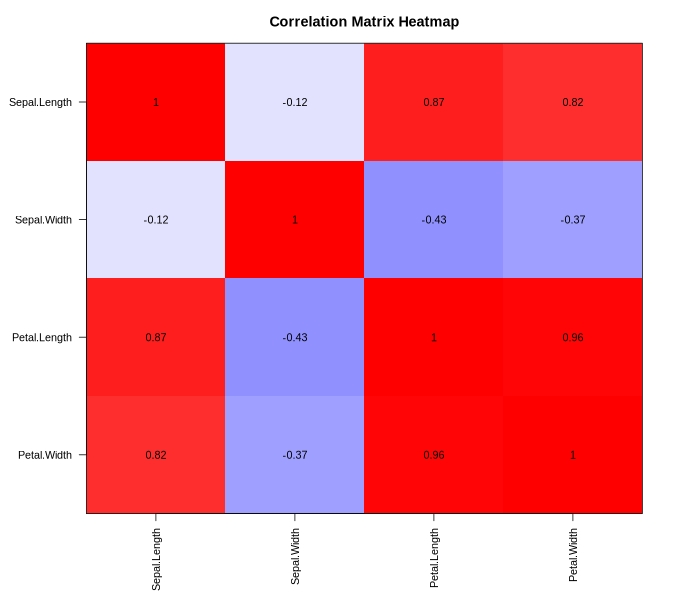

In [ ]:
# Visualize correlation matrix as a heatmap
library(IRdisplay)

# Calculate correlation matrix
cor_matrix <- cor(iris_numeric, method = "pearson")

# Create heatmap visualization
jpeg("/tmp/cor_matrix.jpg", width = 700, height = 600, quality = 100)
par(mar = c(6, 6, 3, 4), cex = 1.0)

# Create color palette (blue = negative, white = zero, red = positive)
colors <- colorRampPalette(c("blue", "white", "red"))(100)

# Plot heatmap
image(1:ncol(cor_matrix), 1:nrow(cor_matrix), t(cor_matrix)[, nrow(cor_matrix):1],
      col = colors, zlim = c(-1, 1),
      xlab = "", ylab = "", axes = FALSE)

# Add axis labels
axis(1, at = 1:ncol(cor_matrix), labels = colnames(cor_matrix), las = 2, cex.axis = 0.9)
axis(2, at = 1:nrow(cor_matrix), labels = rev(rownames(cor_matrix)), las = 1, cex.axis = 0.9)

# Add correlation values as text
for (i in 1:ncol(cor_matrix)) {
    for (j in 1:nrow(cor_matrix)) {
        text(i, nrow(cor_matrix) - j + 1, round(cor_matrix[j, i], 2), cex = 0.9)
    }
}

# Add title
title(main = "Correlation Matrix Heatmap", cex.main = 1.2)

# Add color legend
legend_vals <- seq(-1, 1, by = 0.5)
box()

dev.off()

# Display the image
display_jpeg(file = "/tmp/cor_matrix.jpg")

### Visualizing Correlations: The Heatmap

A **correlation heatmap** provides an intuitive visual summary:
- **Color intensity** shows correlation strength
- **Color hue** shows direction (blue = negative, red = positive)
- **Quick pattern recognition**: Easily spot clusters of related variables

**How to Read This Heatmap**:
- Dark red cells = strong positive correlation
- Dark blue cells = strong negative correlation  
- White/light cells = weak or no correlation
- Numbers in cells = exact correlation values

**Business Use**: Identify which variables move together to inform:
- Feature selection for predictive models
- Multicollinearity concerns in regression
- Related KPIs that might be redundant

## 8. Data Exploration with Visualizations

### Why Visualization Matters in Business

> "A picture is worth a thousand words" — especially in data analysis

Visualizations help you:
1. **Identify patterns** that numbers alone can't reveal
2. **Detect outliers** that could skew your analysis
3. **Communicate findings** to non-technical stakeholders
4. **Validate assumptions** before running statistical tests

### Key Visualizations for Exploratory Analysis

| Visualization | Purpose | What to Look For |
|---------------|---------|------------------|
| **Scatterplot** | Relationship between two variables | Patterns, clusters, outliers |
| **Boxplot** | Distribution and outliers | Median, spread, extreme values |
| **Density Plot** | Distribution shape | Skewness, multimodality |
| **Histogram** | Frequency distribution | Symmetry, gaps, peaks |

### Business Context: The Swiss Dataset

We'll use R's built-in **Swiss Fertility dataset** which contains standardized fertility and socio-economic indicators for 47 French-speaking provinces of Switzerland (circa 1888).

Variables include:
- **Fertility**: Common standardized fertility measure
- **Agriculture**: % of males in agriculture
- **Examination**: % draftees receiving highest mark on army exam
- **Education**: % education beyond primary school
- **Catholic**: % Catholic (vs Protestant)
- **Infant.Mortality**: Live births who live less than 1 year

This dataset is commonly used to explore how socio-economic factors relate to fertility rates — a classic demographic and economic question.

In [ ]:
# Load built-in Swiss dataset
# Standardized fertility and socio-economic indicators for 47 French-speaking provinces
data(swiss)
head(swiss)
names(swiss)

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6
Porrentruy,76.1,35.3,9,7,90.57,26.6


[1] "Fertility"        "Agriculture"      "Examination"      "Education"       
[5] "Catholic"         "Infant.Mortality"

agg_record_51454081 
                  2

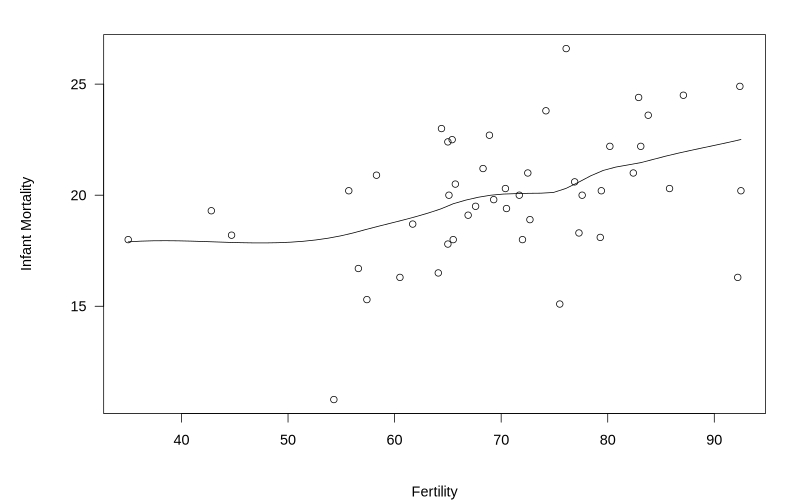

In [ ]:
# Scatterplot with smoothing line
# Use jpeg device for consistent rendering
library(IRdisplay)

jpeg("/tmp/scatter_plot.jpg", width = 800, height = 500, quality = 100)
par(mar = c(5, 6, 2, 2), cex = 1.2, las = 1)
scatter.smooth(x = swiss$Fertility, y = swiss$Infant.Mortality, 
    main = "", xlab = "Fertility", ylab = "Infant Mortality", 
    mgp = c(4, 1, 0))
dev.off()

# Display the image
display_jpeg(file = "/tmp/scatter_plot.jpg")

### Scatterplots with Smoothing Lines

A **scatterplot** displays the relationship between two continuous variables. Each point represents one observation.

The **smoothing line** (LOESS/LOWESS) shows the general trend without assuming a specific functional form (like a straight line).

**How to Interpret**:
- **Positive slope**: As X increases, Y tends to increase
- **Negative slope**: As X increases, Y tends to decrease  
- **Flat line**: No apparent relationship
- **Curved line**: Non-linear relationship (important for model selection)
- **Scattered points**: Weak relationship (high variability)
- **Tight clustering around line**: Strong relationship

**Business Example**: Plotting marketing spend vs. sales revenue. A strong positive relationship with tight clustering suggests predictable ROI from marketing investments.

agg_record_253026621 
                   2

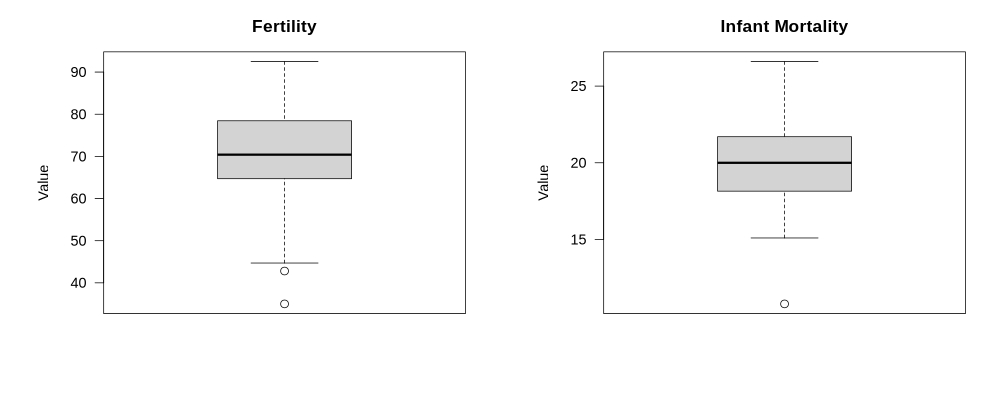

In [ ]:
# Boxplots to identify outliers
library(IRdisplay)

jpeg("/tmp/boxplot.jpg", width = 1000, height = 400, quality = 100)
par(mfrow = c(1, 2), mar = c(5, 6, 3, 2), cex = 1.2, las = 1)

boxplot(swiss$Fertility, main = "Fertility", ylab = "Value", mgp = c(4, 1, 0))
boxplot(swiss$Infant.Mortality, main = "Infant Mortality", ylab = "Value", mgp = c(4, 1, 0))

dev.off()

# Display the image
display_jpeg(file = "/tmp/boxplot.jpg")

### Boxplots: Detecting Outliers and Understanding Distribution

A **boxplot** (box-and-whisker plot) visualizes the five-number summary:

```
        ┌─────┐
   ─────┤     ├─────  ← Upper whisker (Max or 1.5×IQR)
        │     │
        ├─────┤       ← Q3 (75th percentile)
        │  │  │       ← Median line
        ├─────┤       ← Q1 (25th percentile)
        │     │
   ─────┤     ├─────  ← Lower whisker (Min or 1.5×IQR)
        └─────┘
          ○           ← Outlier (beyond whiskers)
```

**How to Interpret**:
- **Box height (IQR)**: Shows where 50% of data falls — larger box = more variability
- **Median position**: If near box center = symmetric; if skewed toward one edge = skewed distribution
- **Whisker length**: Short = tight distribution; long = spread out
- **Individual points beyond whiskers**: Potential outliers requiring investigation

**Business Application**: Quality control uses boxplots to identify products/processes outside acceptable ranges. In customer analytics, outliers might be VIP customers or fraud cases.

In [ ]:
# Load e1071 for skewness calculation
# Pre-installed in container via install_r_packages.sh
library(e1071)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



agg_record_1708550026 
                    2

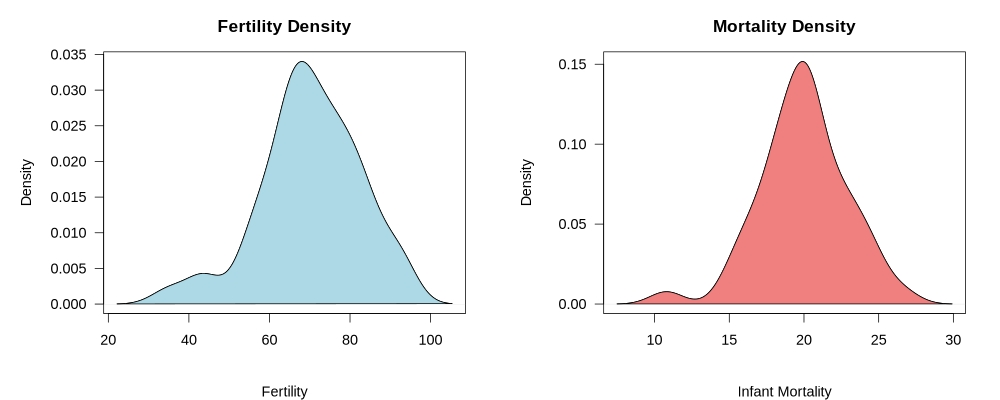

In [ ]:
# Density plots to check distribution shape
library(IRdisplay)

jpeg("/tmp/density_plot.jpg", width = 1000, height = 400, quality = 100)
par(mfrow = c(1, 2), mar = c(5, 6, 3, 2), cex = 1.2, las = 1)

plot(density(swiss$Fertility), main = "Fertility Density", 
     xlab = "Fertility", mgp = c(4, 1, 0))
polygon(density(swiss$Fertility), col = "lightblue")

plot(density(swiss$Infant.Mortality), main = "Mortality Density", 
     xlab = "Infant Mortality", mgp = c(4, 1, 0))
polygon(density(swiss$Infant.Mortality), col = "lightcoral")

dev.off()

# Display the image
display_jpeg(file = "/tmp/density_plot.jpg")

### Density Plots: Understanding Distribution Shape

A **density plot** is a smoothed version of a histogram that shows the probability distribution of a variable.

**What to Look For**:

| Shape | Description | Business Implication |
|-------|-------------|---------------------|
| **Symmetric/Bell-shaped** | Normal distribution | Mean is a good summary; standard methods apply |
| **Right-skewed** | Long tail to the right | Use median; watch for high-value outliers |
| **Left-skewed** | Long tail to the left | Rare; consider lower-bound constraints |
| **Bimodal** | Two peaks | Possible two distinct groups in data |
| **Uniform** | Flat distribution | All values equally likely |

**Why This Matters for Analysis**:
- Many statistical tests **assume normality** — density plots help verify this
- **Skewed data** may need transformation (log, square root) before analysis
- **Bimodal distributions** suggest the need to segment data into groups

**Business Example**: Customer spending might be bimodal — one peak for regular customers, another for premium customers. Analyzing them together would obscure important patterns.

## 9. Testing for Normality

### Why Normality Testing Matters in Business Analytics

Many statistical methods **assume data is normally distributed**:
- t-tests and ANOVA
- Linear regression (residuals should be normal)
- Pearson correlation
- Control charts in quality management

If this assumption is violated, results may be unreliable. Normality testing helps you:
1. **Choose appropriate methods**: Parametric vs. non-parametric tests
2. **Decide on data transformations**: Log, square root, Box-Cox
3. **Validate model assumptions**: Check regression residuals

### The Shapiro-Wilk Test

The **Shapiro-Wilk test** is one of the most powerful normality tests, especially for small to medium samples (n < 5000).

**Hypotheses**:
- **H₀ (Null)**: Data comes from a normal distribution
- **H₁ (Alternative)**: Data does not come from a normal distribution

**Decision Rule** (using α = 0.05):
| p-value | Decision | Interpretation |
|---------|----------|----------------|
| p > 0.05 | Fail to reject H₀ | Data is approximately normal |
| p ≤ 0.05 | Reject H₀ | Data is NOT normally distributed |

### ⚠️ Important Caveats

1. **Large samples**: With very large n, even tiny deviations from normality become "significant" — use visual inspection alongside the test
2. **Small samples**: The test has low power — may fail to detect non-normality
3. **Practical significance**: Many methods are robust to mild violations of normality

In [ ]:
# Shapiro-Wilk test for normality
# H0: Data is normally distributed
# If p > 0.05, we can assume normality

shapiro.test(swiss$Fertility)


	Shapiro-Wilk normality test

data:  swiss$Fertility
W = 0.97307, p-value = 0.3449


In [ ]:
shapiro.test(swiss$Infant.Mortality)


	Shapiro-Wilk normality test

data:  swiss$Infant.Mortality
W = 0.97762, p-value = 0.4978


## 10. Correlation Testing

### Why We Need Statistical Tests for Correlation

Just because you calculate a correlation coefficient doesn't mean the relationship is **real** (statistically significant). The observed correlation could be due to random chance, especially with small samples.

**Correlation testing** answers: "Is this correlation statistically significant, or could we have observed this by chance?"

### Interpreting `cor.test()` Output

The output includes:
| Component | Meaning |
|-----------|---------|
| **t** | Test statistic — how many standard errors the correlation is from zero |
| **df** | Degrees of freedom — related to sample size |
| **p-value** | Probability of observing this correlation if there were no true relationship |
| **confidence interval** | Range of plausible values for the true correlation |
| **sample estimate** | The calculated correlation coefficient |

### Decision Rule for Significance

Using α = 0.05 (standard significance level):

| p-value | Decision | Business Interpretation |
|---------|----------|------------------------|
| p < 0.05 | **Significant** | Strong evidence of a real relationship — worth investigating further |
| p ≥ 0.05 | **Not significant** | Insufficient evidence — observed correlation might be chance |

### Practical vs. Statistical Significance

**A correlation can be statistically significant but not practically important** (and vice versa):
- With n = 10,000, even r = 0.03 might be "significant" — but it's useless for prediction
- With n = 30, r = 0.40 might not be "significant" — but it could indicate a meaningful business relationship worth exploring

Always consider both the **p-value** (statistical significance) and the **magnitude of r** (practical significance).

In [ ]:
# Calculate correlation coefficient
cor(swiss$Fertility, swiss$Infant.Mortality)

[1] 0.416556

In [ ]:
# Correlation test with p-value
# If p < 0.05, correlation is statistically significant
value_rho <- cor.test(swiss$Fertility, swiss$Infant.Mortality, method = "pearson")
value_rho


	Pearson's product-moment correlation

data:  swiss$Fertility and swiss$Infant.Mortality
t = 3.0737, df = 45, p-value = 0.003585
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1469699 0.6285366
sample estimates:
     cor 
0.416556 


---

## Summary: Your Data Analysis Toolkit

### What You've Learned

| Section | Key Functions | Business Application |
|---------|---------------|---------------------|
| **1. Data Import** | `read.csv()`, `read.table()` | Ingest data from various business systems |
| **2. Data Exploration** | `str()`, `dim()`, `head()`, `names()` | Understand what you're working with before analysis |
| **3. Summary Statistics** | `summary()`, `describe()`, `stat.desc()` | Quantify central tendency and variability |
| **4. Data Transformation** | `transform()`, arithmetic operators | Create KPIs and derived metrics |
| **5. Recoding** | `ifelse()`, conditional assignment | Segment customers, categorize risks |
| **6. Data Export** | `write.csv()` | Share results with stakeholders |
| **7. Correlation Analysis** | `cor()` | Identify relationships between variables |
| **8. Visualization** | `boxplot()`, `density()`, `scatter.smooth()` | Communicate insights, detect issues |
| **9. Normality Testing** | `shapiro.test()` | Validate statistical assumptions |
| **10. Correlation Testing** | `cor.test()` | Confirm relationships are statistically significant |

### The Data Analysis Workflow

```
┌─────────────┐    ┌─────────────┐    ┌─────────────┐    ┌─────────────┐
│   IMPORT    │ →  │   EXPLORE   │ →  │   CLEAN &   │ →  │   ANALYZE   │
│   Data      │    │   Data      │    │  TRANSFORM  │    │   Data      │
└─────────────┘    └─────────────┘    └─────────────┘    └─────────────┘
     ↓                   ↓                   ↓                   ↓
 read.csv()        str(), summary()    transform(),        cor(), 
 read.table()      head(), tail()      ifelse()            cor.test()
                   dim(), names()                          shapiro.test()
```

### Key Takeaways for Business Analytics

1. **Always explore before you analyze** — Never trust data blindly
2. **Know your distributions** — Mean vs. median, normal vs. skewed
3. **Correlation ≠ Causation** — Use controlled experiments for causal claims
4. **Statistical significance ≠ Practical significance** — Consider effect sizes
5. **Document your transformations** — Future you (and your colleagues) will thank you

### Next Steps

Now that you have a foundation in data cleaning and exploration, you're ready for:
- **Module 2**: ANOVA and comparing group means
- **Module 3**: Dimensionality reduction (PCA)
- **Module 4**: Factor analysis
- **Advanced topics**: Regression modeling, predictive analytics

---
*This notebook is designed as a teaching reference. Run each cell and study the outputs to reinforce your understanding.*